![Control panel at Three Mile Island generating station](controlroomTMI.jpg "The Control Panel")

## Basic plotting: bar charts and histograms with altair, matplotlib, and plotnine

ipython has "magic" commands, %pwd, %cd, which are intended to make life easier for humans, like showing our directory and letting us change directory.

In [1]:
# Let us first handle the preliminary imports
import pandas as pd
import altair as alt
import plotnine as p9

Note: you can import all of the functions
defined in a module with 
    from pandas import *
This means less typing (good for interactive programming)
but also obscures which code comes from which library.

In [2]:
rainfall = pd.read_csv("../data/cities.csv",delimiter="\t")

In [3]:
head(rainfall)

NameError: name 'head' is not defined

Sorry about that, .head() is a method that belongs to pandas data frames.. I have to call df.head()

In [4]:
rainfall.head()

,Days,"City, State",Inches,Milimeters
0,113,"Atlanta, GA",49.7,1263
1,88,"Austin, TX",34.2,870
2,116,"Baltimore, MD",41.9,1064
3,117,"Birmingham, AL",53.7,1364
4,126,"Boston, MA",43.8,1112


In [5]:
rainfall.shape

(17, 4)

In [6]:
# Let's just quick check what data types this has:
print(rainfall["Days"].dtype)
print(rainfall["City, State"].dtype)
print(rainfall["Inches"].dtype)
print(rainfall["Milimeters"].dtype)

int64
object
float64
int64


In [7]:
rainfall.dtypes

Days             int64
City, State     object
Inches         float64
Milimeters       int64
dtype: object

In [8]:
# I can add a new column that is easier to type:
rainfall["City"] = rainfall["City, State"]
rainfall

,Days,"City, State",Inches,Milimeters,City
0,113,"Atlanta, GA",49.7,1263,"Atlanta, GA"
1,88,"Austin, TX",34.2,870,"Austin, TX"
2,116,"Baltimore, MD",41.9,1064,"Baltimore, MD"
3,117,"Birmingham, AL",53.7,1364,"Birmingham, AL"
4,126,"Boston, MA",43.8,1112,"Boston, MA"
5,167,"Buffalo, NY",40.5,1028,"Buffalo, NY"
6,110,"Charlotte, NC",41.6,1057,"Charlotte, NC"
7,124,"Chicago, IL",36.9,937,"Chicago, IL"
8,137,"Cincinnati, OH",41.9,1065,"Cincinnati, OH"
9,155,"Cleveland, OH",39.1,994,"Cleveland, OH"


In [9]:
rainfall.City.values

array(['Atlanta, GA ', 'Austin, TX ', 'Baltimore, MD ', 'Birmingham, AL ',
       'Boston, MA ', 'Buffalo, NY ', 'Charlotte, NC', 'Chicago, IL',
       'Cincinnati, OH ', 'Cleveland, OH ', 'Columbus, OH ',
       'Dallas, TX ', 'Denver, CO', 'Detroit, MI ', 'Hartford, CT ',
       'Houston, TX ', 'Indianapolis, IN '], dtype=object)

In [10]:
# basic, altair-defaults bar chart:
alt.Chart(rainfall).mark_bar().encode(
    alt.X("City"), 
    alt.Y("Milimeters"))

alt.Chart(...)

In [11]:
# basic, altair-defaults bar chart:
alt.Chart(rainfall).mark_bar(
).encode(
    alt.X("City:N"), 
    alt.Y("Milimeters:Q"))

alt.Chart(...)

In [12]:
# basic, altair-defaults dot chart:
alt.Chart(rainfall).mark_point(
).encode(alt.X("City:N"), 
         alt.Y("Milimeters:Q"))

alt.Chart(...)

In [13]:
# basic, altair-defaults line chart:
alt.Chart(rainfall).mark_line(
).encode(alt.X("City:N"), 
         alt.Y("Milimeters:Q"))

alt.Chart(...)

In [14]:
# We can put the city names in y, where they are easier to read:
alt.Chart(rainfall).mark_bar().encode(
    alt.Y("City:N"), 
    alt.X("Milimeters:Q"))

alt.Chart(...)

In [17]:
# Can I sort my data?  
alt.Chart(rainfall.sort_values("Milimeters")).mark_bar().encode(
    alt.Y("City:N"), 
    alt.X("Milimeters:Q", sort="ascending"))

alt.Chart(...)

In [15]:
# Well, what I want is Y (City) sorted by values in 
# X (Milimeters)... 
alt.Chart(rainfall).mark_bar().encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters")), 
    alt.X("Milimeters:Q", sort="ascending"))

alt.Chart(...)

alt.Chart(...)

Note, the syntax here (the precise magical incantation to cause the sorting) is *not* at all obvious.  We have to look this up in the altair documentation: 
https://altair-viz.github.io/user_guide/generated/channels/altair.X.html

We can reverse the order by making the "sort" argument to alt.Y a more complex alt.Sort object instead of just a field name:

In [18]:
alt.Chart(rainfall).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))

alt.Chart(...)

Search-engine "altair font size"... https://stackoverflow.com/questions/53401693/how-do-you-set-axis-fontsize-in-altair ... postpend this

    .configure_axis(
    labelFontSize=20,
    titleFontSize=20
    )
    
And `Chart` takes a title option... 

In [49]:
alt.Chart(rainfall, title=["Some rainfall", "in some places"]).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))    .configure_axis(
    labelFontSize=20,
    titleFontSize=20
    )

alt.Chart(...)

The title font size is now a bit small.. 
https://stackoverflow.com/questions/54855337/increase-font-size-of-chart-title-in-altair?rq=3

    .configure_title(fontSize=24)

In [50]:
alt.Chart(rainfall, title=["Some rainfall", "in some places"]).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))    .configure_axis(
    labelFontSize=20,
    titleFontSize=20
    )    .configure_title(fontSize=24)

alt.Chart(...)

In [ ]:
# change the font

https://stackoverflow.com/questions/73338942/how-to-install-a-new-font-in-altair-and-specifying-it-in-alt-titleparams
 
    title=alt.TitleParams(
        text='Example Chart',
        fontSize=24,
        fontStyle='italic',
        font='Times'
    )

In [54]:
alt.Chart(rainfall, title=alt.TitleParams(
        text='Some rainfall',
        fontSize=24,
        font='Times'
    )).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))    .configure_axis(
    labelFontSize=20,
    titleFontSize=20
    )    .configure_title(fontSize=24)

alt.Chart(...)

In [57]:
#  Aaand we can get serif fonts on the axes if we 
# add arguments to configure_axis too.
alt.Chart(rainfall, title=alt.TitleParams(
        text='Some rainfall',
        fontSize=24,
        font='Times'
    )).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))    .configure_axis(
    labelFontSize=20,
    labelFont='Times',
    titleFontSize=20,
    titleFont='Times'
    )    .configure_title(fontSize=24)

alt.Chart(...)

That was altair.   

Now what do we remember about the matplotlib API...
we can generate plots three ways:
* data.plot()
* plt.plot(data)
* fig,ax = plt.subplot()  
* *  ax.plot(data)

In [19]:
import matplotlib.pyplot as plt

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

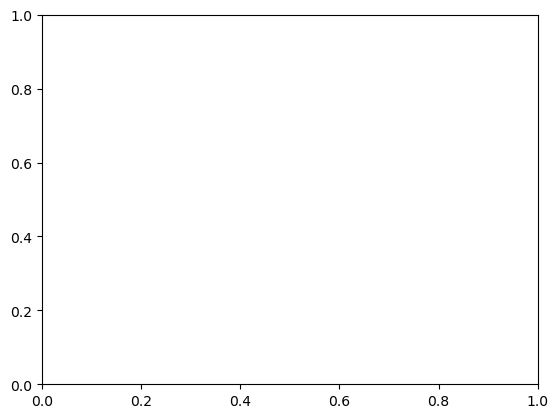

In [21]:
fig, ax = plt.subplots()
(type(fig), type(ax))

(1920.0, 2040.0)

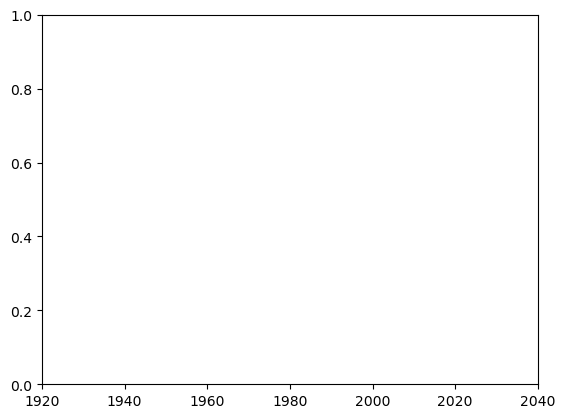

In [22]:
# Two different ways to set the max and min of x axis:
plt.xlim([1920 , 2040])
ax.set_xlim([1920 , 2040])

<BarContainer object of 17 artists>

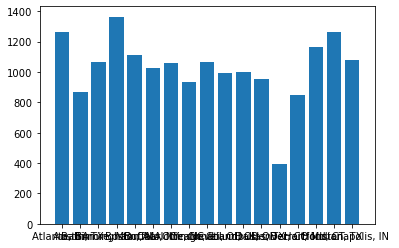

In [20]:
plt.bar(rainfall["City"], rainfall["Milimeters"])

In [22]:
# This is not acceptable.  Perhaps the documentation will help?
plt.bar?

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bars bases.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left edges of the bars 

1

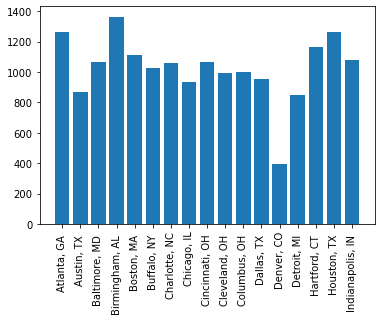

In [26]:
# This doesn't help.  But a quick search reveals the solution:
plt.bar(rainfall["City"], rainfall["Milimeters"])
plt.xticks(rotation=90)
1
# I was able to use this only because xticks() is exposed in the plt interface.

1

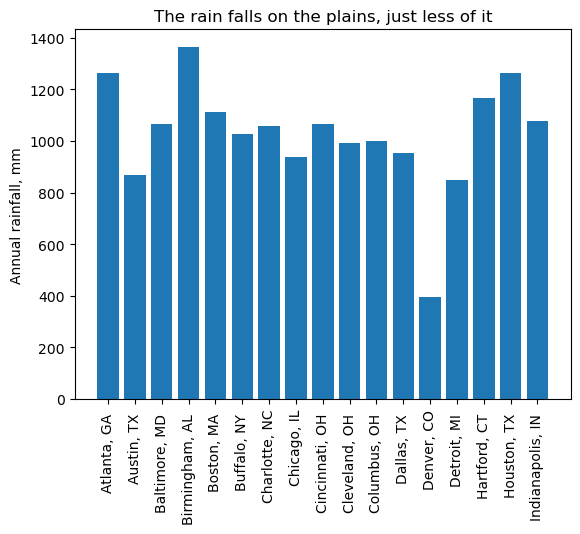

In [23]:
plt.bar(rainfall["City"], rainfall["Milimeters"])
plt.xticks(rotation=90)
plt.ylabel("Annual rainfall, mm")
plt.title("The rain falls on the plains, just less of it")
1

In [24]:
print(len(rainfall))
rainfall.head()

17


,Days,"City, State",Inches,Milimeters,City
0,113,"Atlanta, GA",49.7,1263,"Atlanta, GA"
1,88,"Austin, TX",34.2,870,"Austin, TX"
2,116,"Baltimore, MD",41.9,1064,"Baltimore, MD"
3,117,"Birmingham, AL",53.7,1364,"Birmingham, AL"
4,126,"Boston, MA",43.8,1112,"Boston, MA"


In [27]:
# matplotlib wants me to sort my data first
rainfallsorted =rainfall.sort_values(by = "Milimeters")
rainfallsorted

,Days,"City, State",Inches,Milimeters,City
12,87,"Denver, CO",15.6,396,"Denver, CO"
13,135,"Detroit, MI",33.5,850,"Detroit, MI"
1,88,"Austin, TX",34.2,870,"Austin, TX"
7,124,"Chicago, IL",36.9,937,"Chicago, IL"
11,81,"Dallas, TX",37.6,954,"Dallas, TX"
9,155,"Cleveland, OH",39.1,994,"Cleveland, OH"
10,139,"Columbus, OH",39.3,998,"Columbus, OH"
5,167,"Buffalo, NY",40.5,1028,"Buffalo, NY"
6,110,"Charlotte, NC",41.6,1057,"Charlotte, NC"
2,116,"Baltimore, MD",41.9,1064,"Baltimore, MD"


1

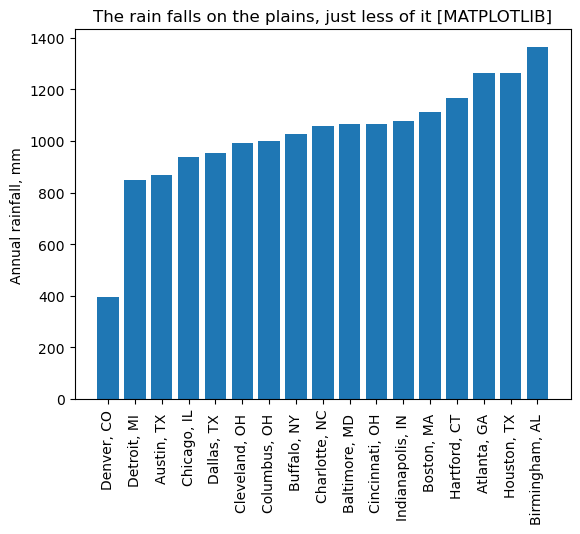

In [26]:
plt.bar(rainfallsorted["City"], rainfallsorted["Milimeters"])
plt.xticks(rotation=90)
plt.ylabel("Annual rainfall, mm")
plt.title("The rain falls on the plains, just less of it [MATPLOTLIB]")
1

1

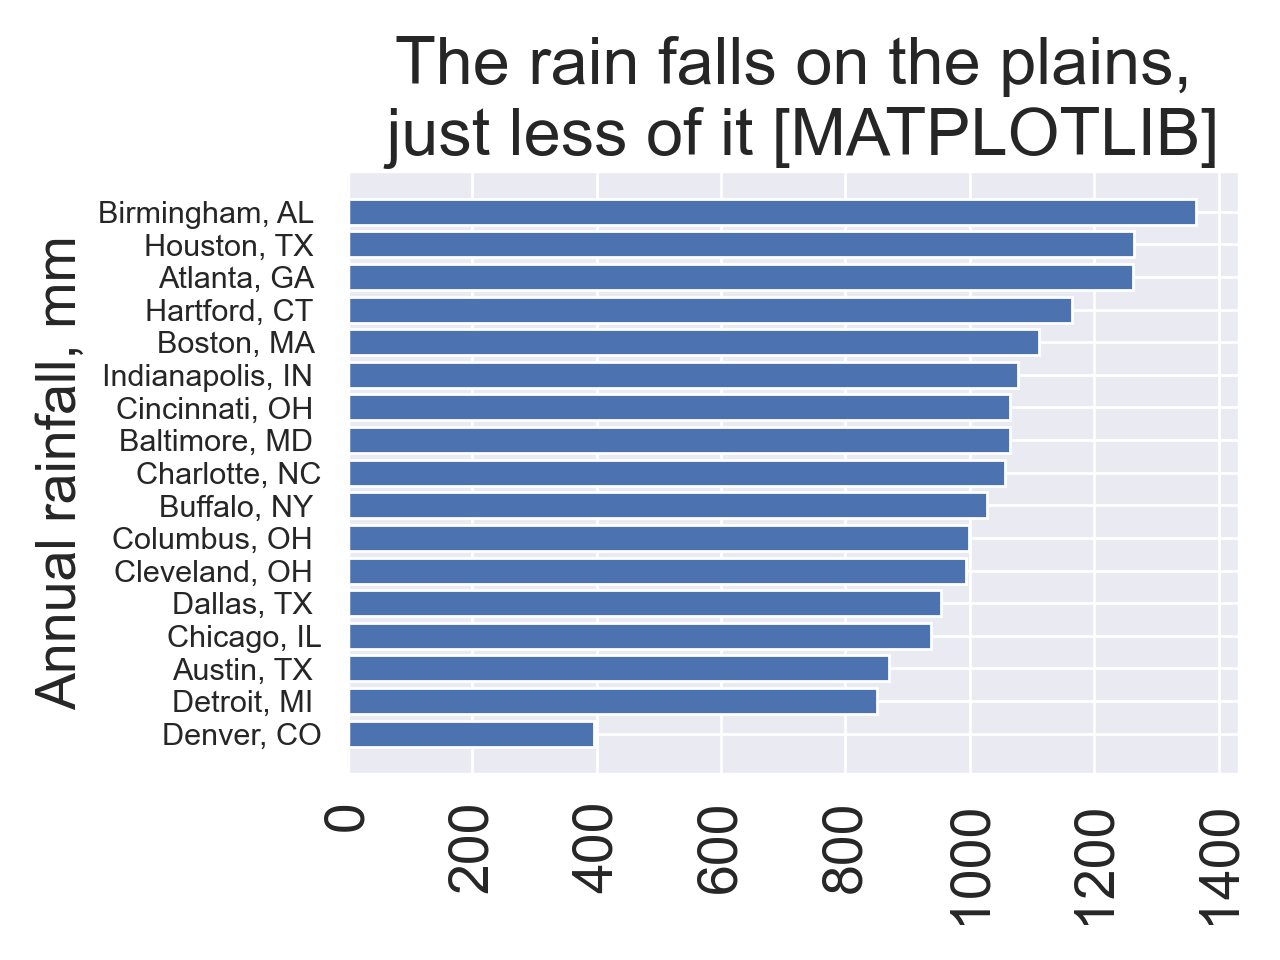

In [66]:
# But this is chopping off the labels..
# The following incantation causes an automatic
# adjustment of the margins in light of the size of the text:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.barh(rainfallsorted["City"], rainfallsorted["Milimeters"])
plt.xticks(rotation=90, fontsize=20)
plt.ylabel("Annual rainfall, mm", fontsize=20)
plt.title("The rain falls on the plains,\n just less of it [MATPLOTLIB]", fontsize=24)
1

1

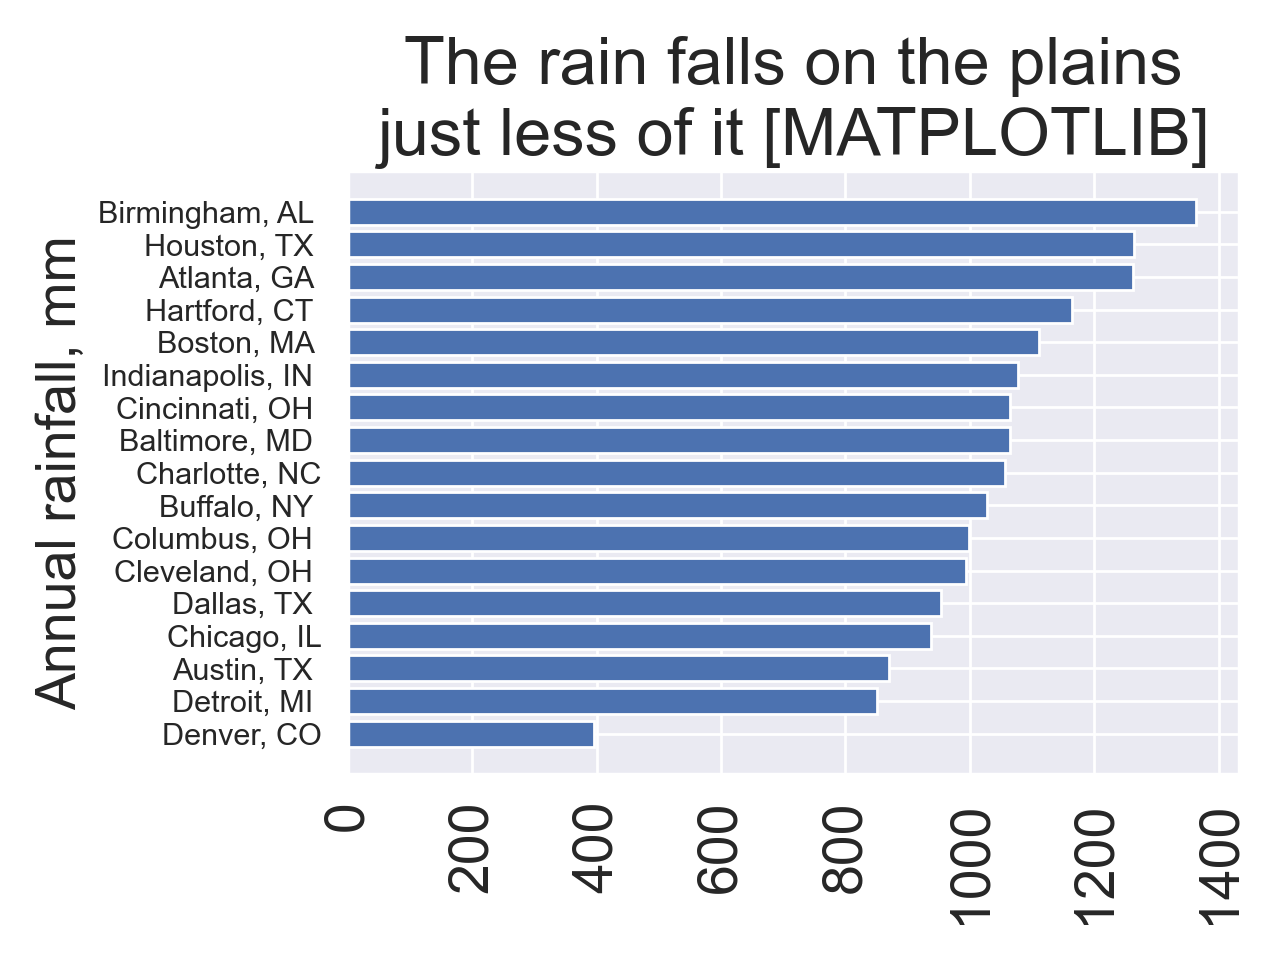

In [65]:
# I can do the same horizontally:
# plt.barh(y_axis,x_axis)
plt.barh(rainfallsorted["City"], rainfallsorted["Milimeters"])
plt.xticks(rotation=90, fontsize=20)
plt.ylabel("Annual rainfall, mm", fontsize=20)
plt.title("The rain falls on the plains\njust less of it [MATPLOTLIB]", 
         fontsize=24)
1

In [32]:
import plotnine as p9

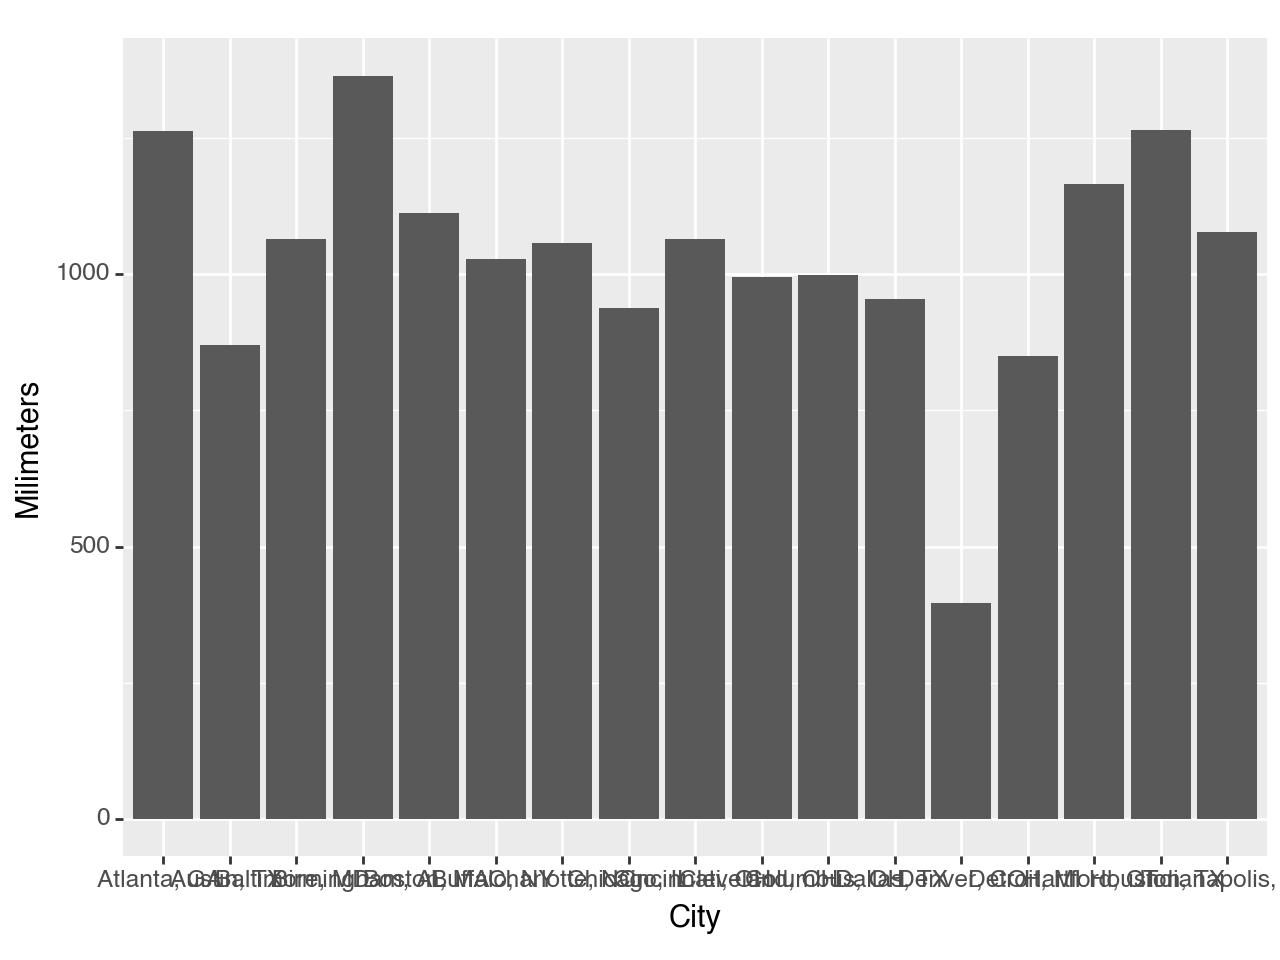

<Figure Size: (640 x 480)>

In [29]:
#  p9.ggplot(data=surveys_complete, mapping=p9.aes(x='factor(year)')) + p9.geom_bar()    

p9.ggplot(
    data=rainfall, 
    mapping=p9.aes(x="City", y="Milimeters")
     ) + p9.geom_bar(stat="identity")

Search engine interlude.  "plotnine rotate x axis labels"
https://stackoverflow.com/questions/47714540/plotnine-rotating-labels
suggests adding 

   + p9.theme(axis_text_x=element_text(rotation=90, hjust=1))
   
to the figure:

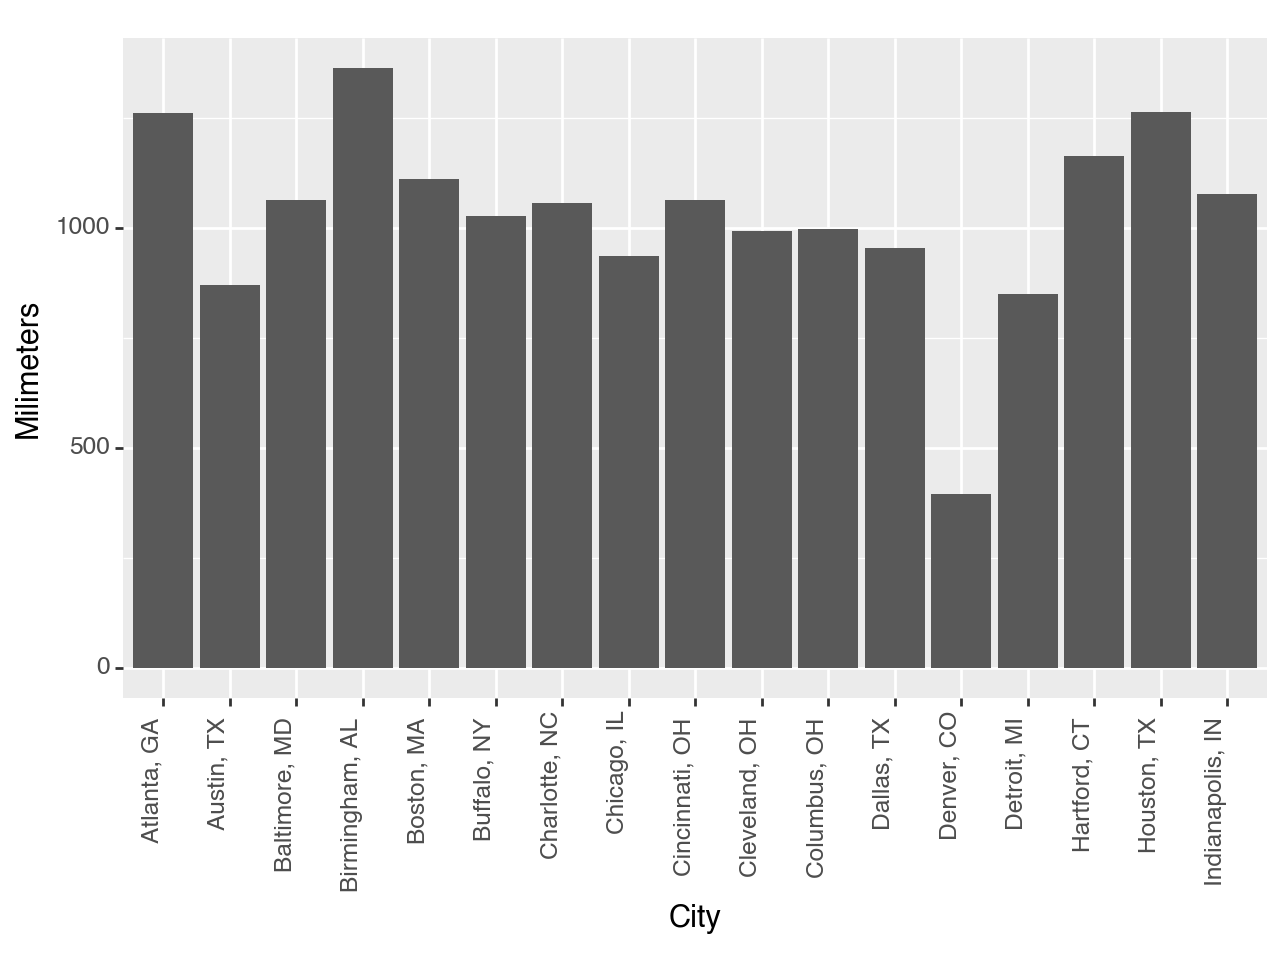

<Figure Size: (640 x 480)>

In [30]:
p9.ggplot(data=rainfall, mapping=p9.aes(x="City", y="Milimeters")) + p9.geom_bar(stat="identity") + p9.theme_geom

AttributeError: module 'plotnine' has no attribute 'theme_geom'

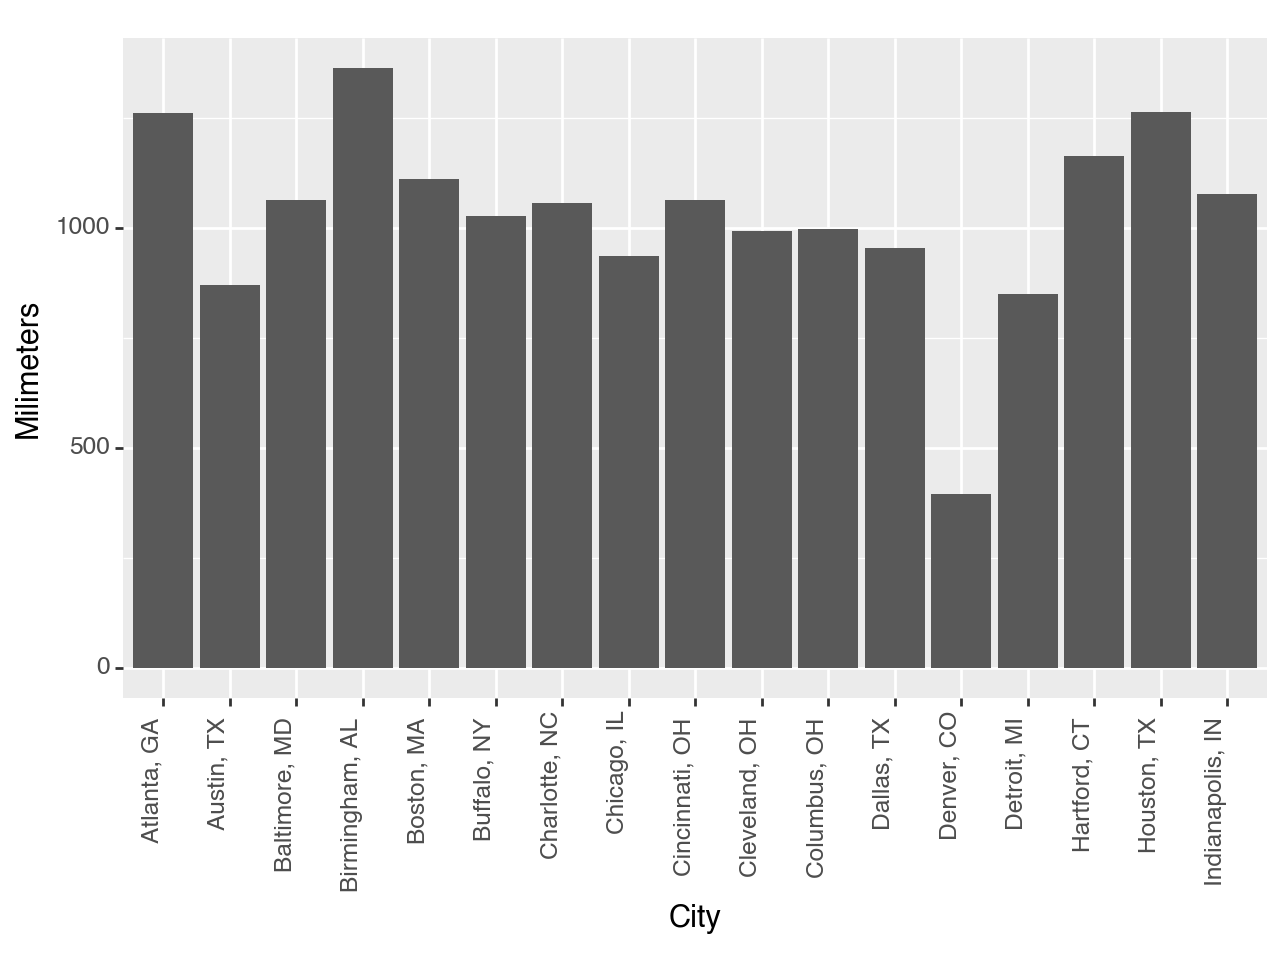

<Figure Size: (640 x 480)>

In [35]:
from plotnine import  element_text
p9.ggplot(
    data=rainfall, 
    mapping=p9.aes(x="City", y="Milimeters")
     ) + p9.geom_bar(
    stat="identity") + p9.theme(
    axis_text_x=element_text(rotation=90, hjust=1))

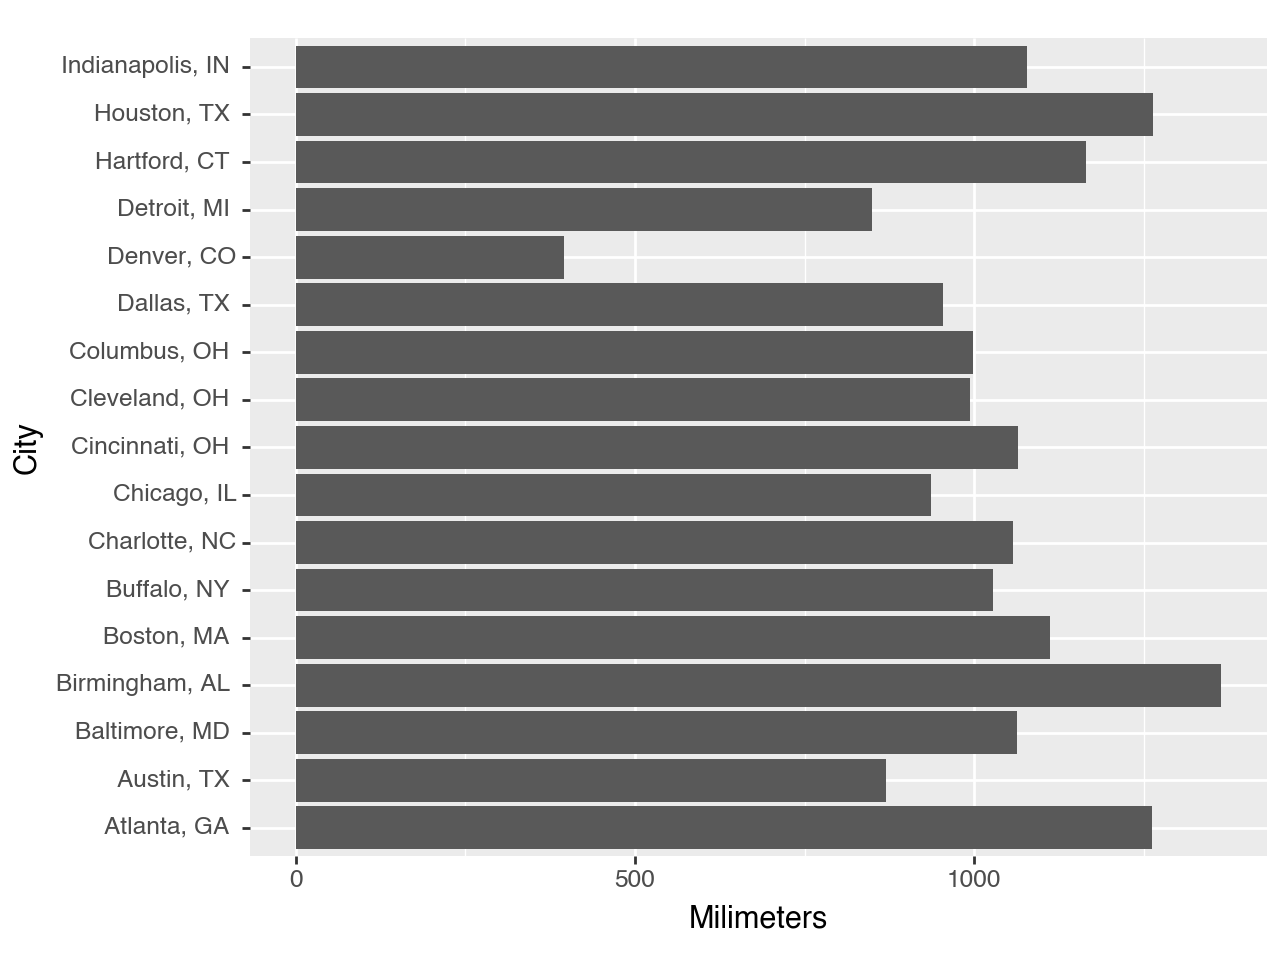

<Figure Size: (640 x 480)>

In [36]:
# swap x and y
p9.ggplot(data=rainfall, 
          mapping=p9.aes(x="City", y="Milimeters")
         ) + p9.geom_bar(stat="identity")+  p9.coord_flip()

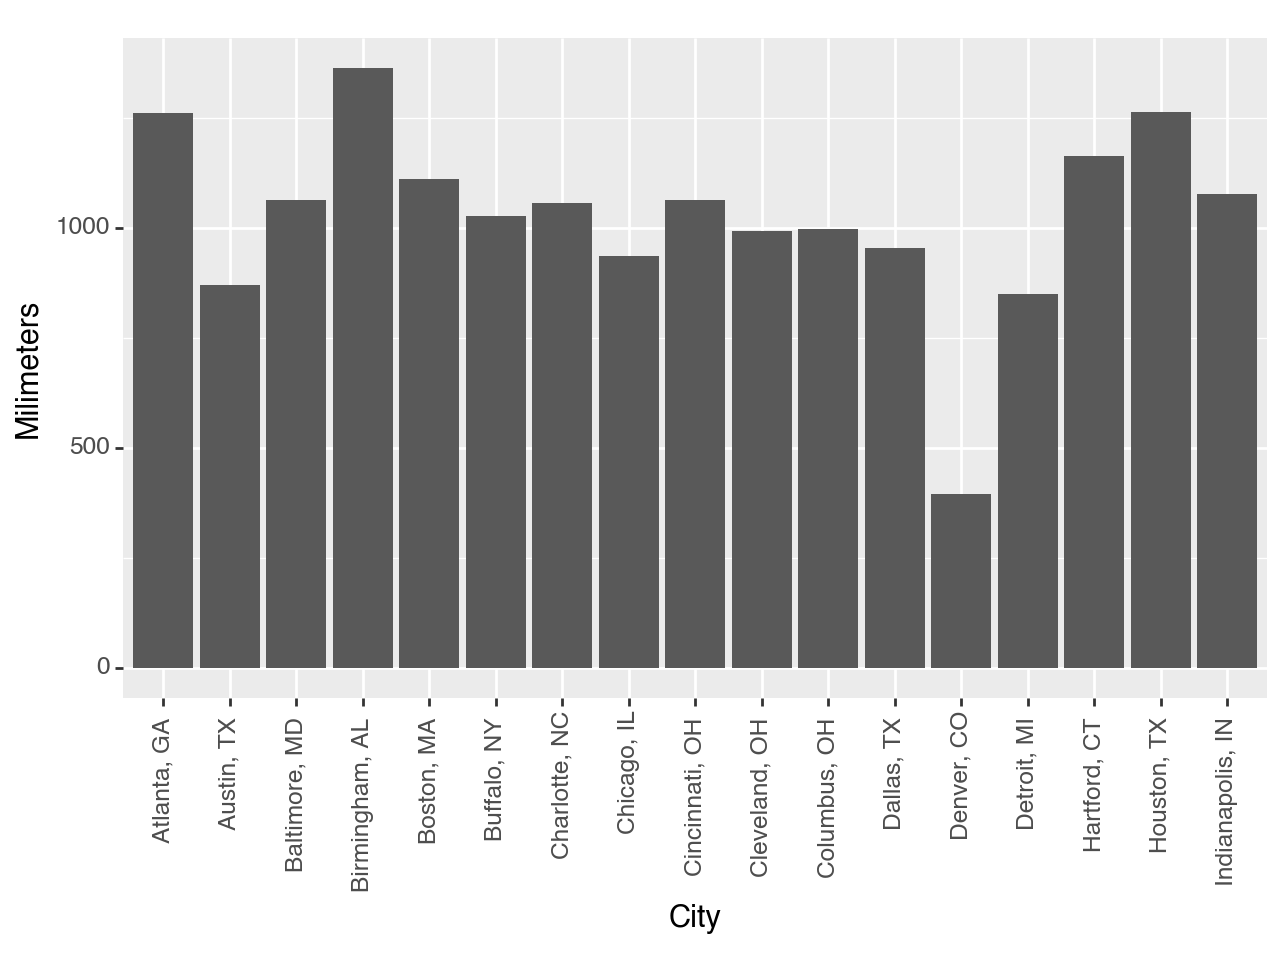

<Figure Size: (640 x 480)>

In [38]:
p9.ggplot(data=rainfallsorted, 
          mapping=p9.aes(x="City", y="Milimeters")
         ) + p9.geom_bar(stat="identity") + p9.theme(axis_text_x = p9.element_text(angle = 90))

In [82]:
# The element_text will take "size" as an option, so
# we can try to boost our font size.

# And to generate a title we "add" p9.ggtitle()


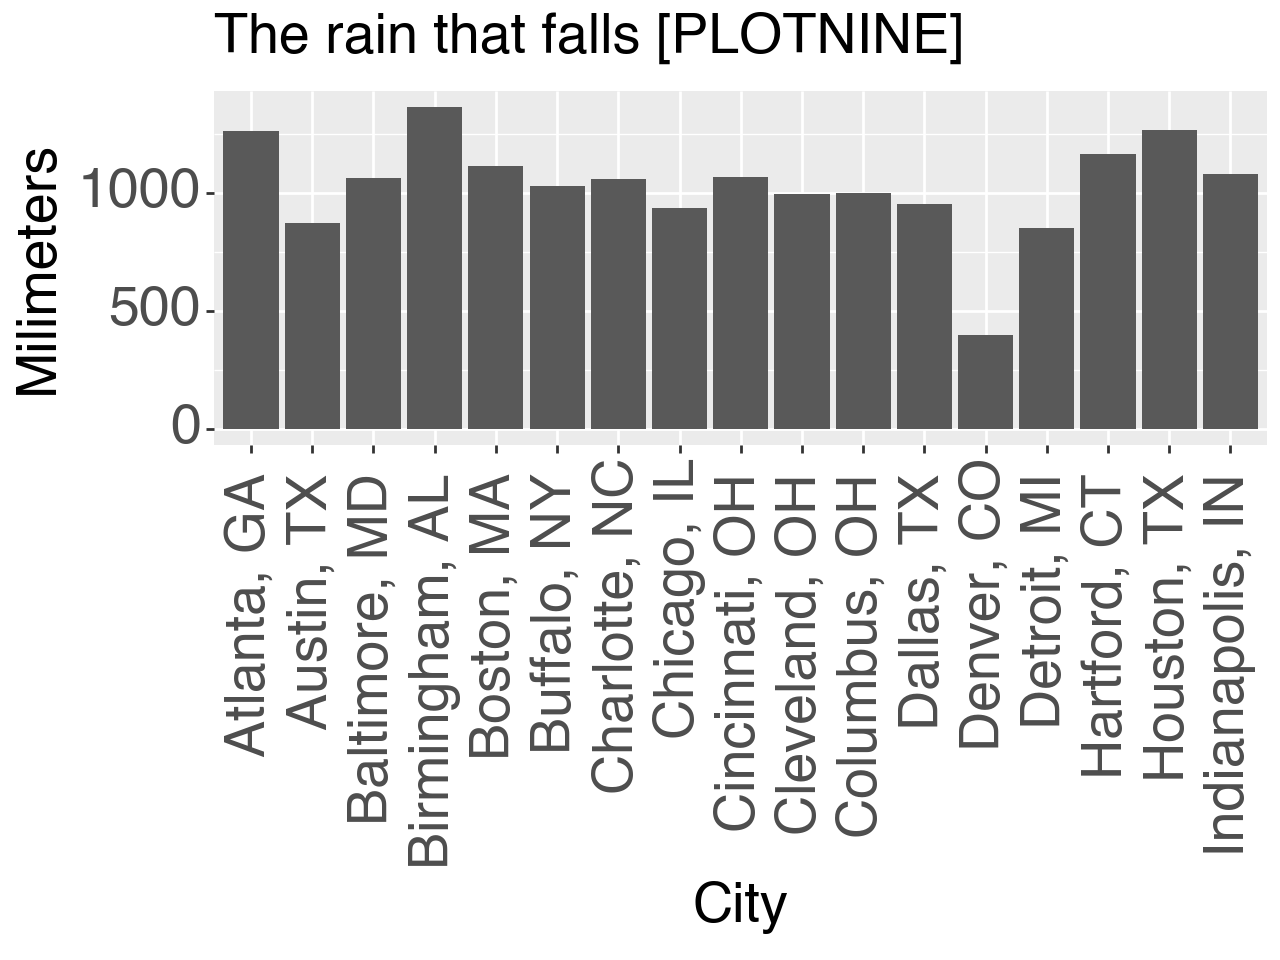

<Figure Size: (640 x 480)>

In [81]:
from plotnine import theme
p9.ggplot(data=rainfallsorted, 
          mapping=p9.aes(x="City", y="Milimeters")) + \
          p9.geom_bar(stat="identity") + \
          p9.theme(axis_text_x = p9.element_text(angle = 90)) + \
          theme(text = element_text(size=20)) + \
          p9.ggtitle("The rain that falls [PLOTNINE]")

In [83]:
# Seaborn is just a pretty wrapper for matplotlib:

In [39]:
import seaborn as sns

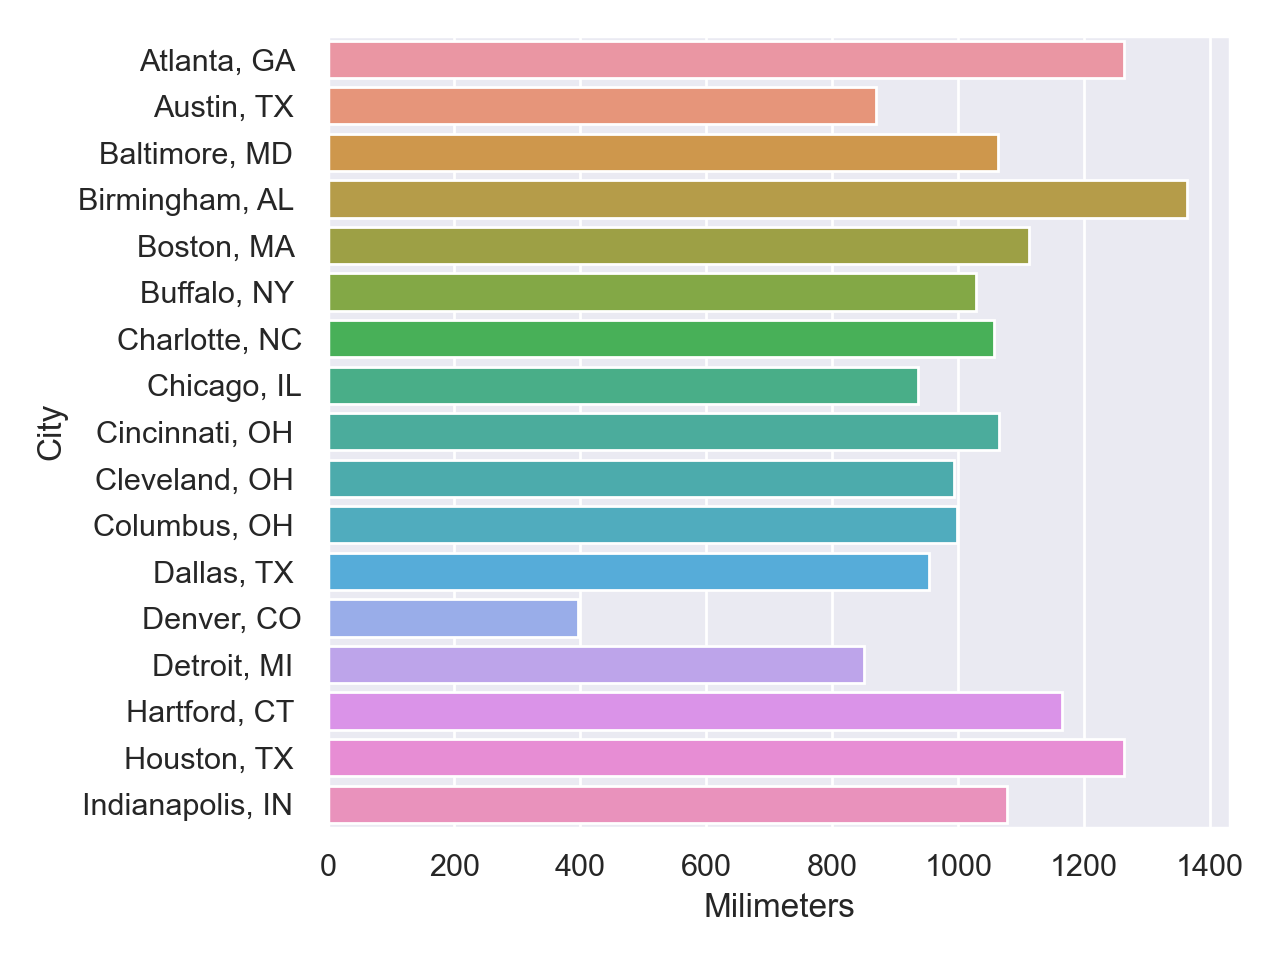

In [84]:
ax = sns.barplot(x="Milimeters", y="City", data=rainfall)

Oh, my.  Well.  Surely there is a knob somewhere that changes the color scheme?

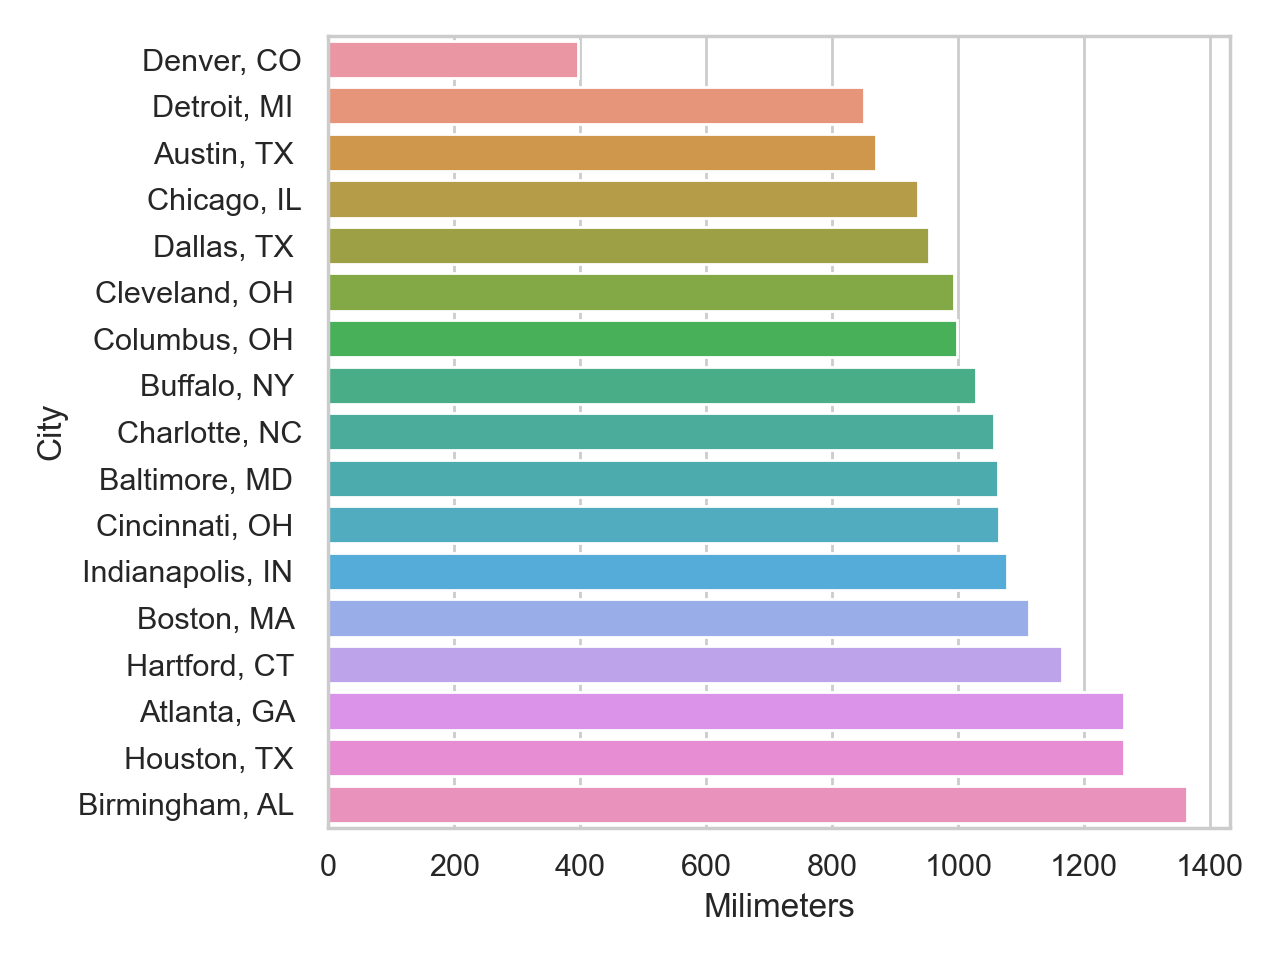

In [85]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

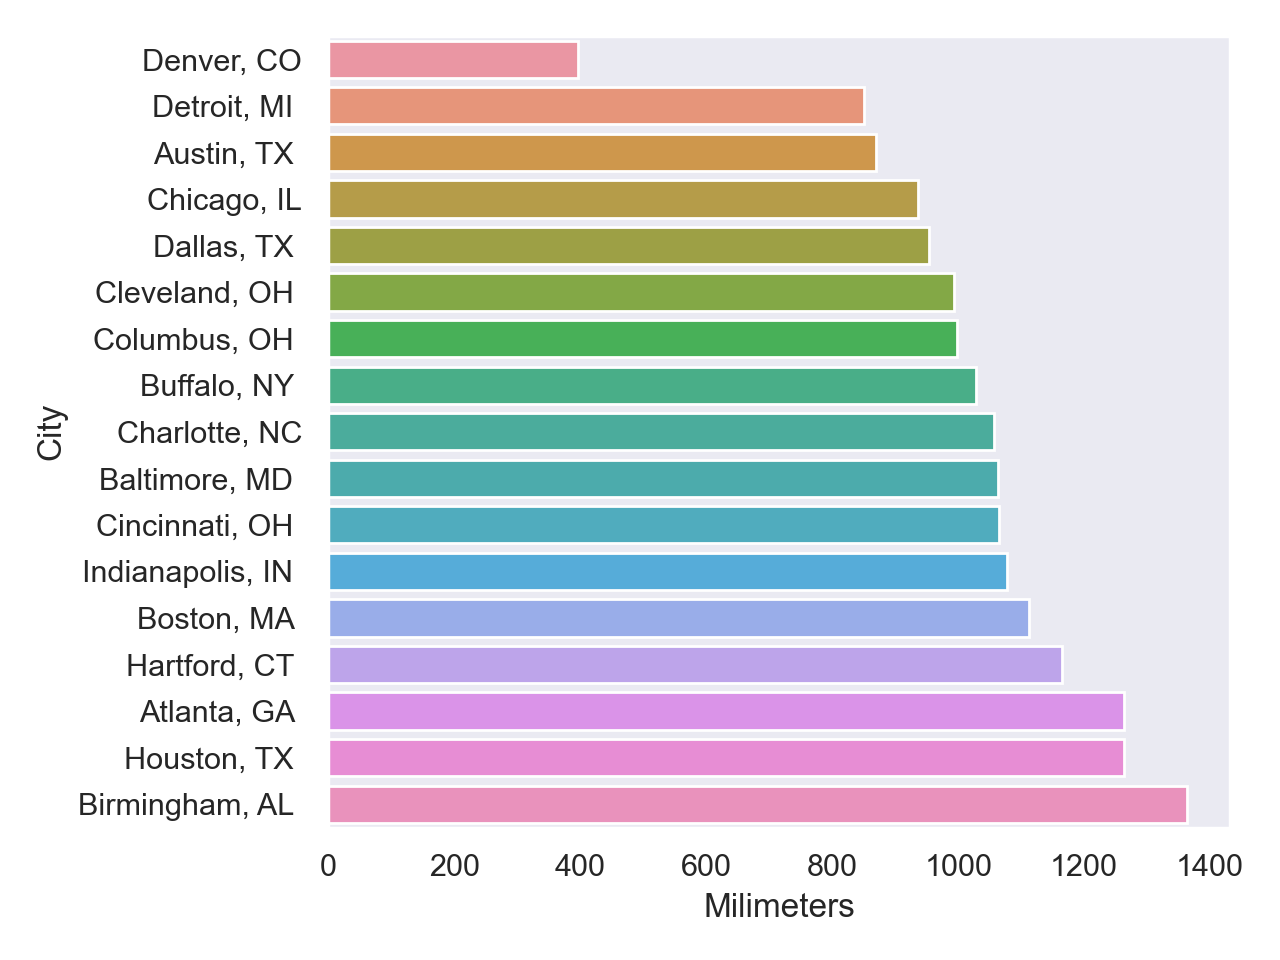

In [86]:
sns.set_style("dark")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

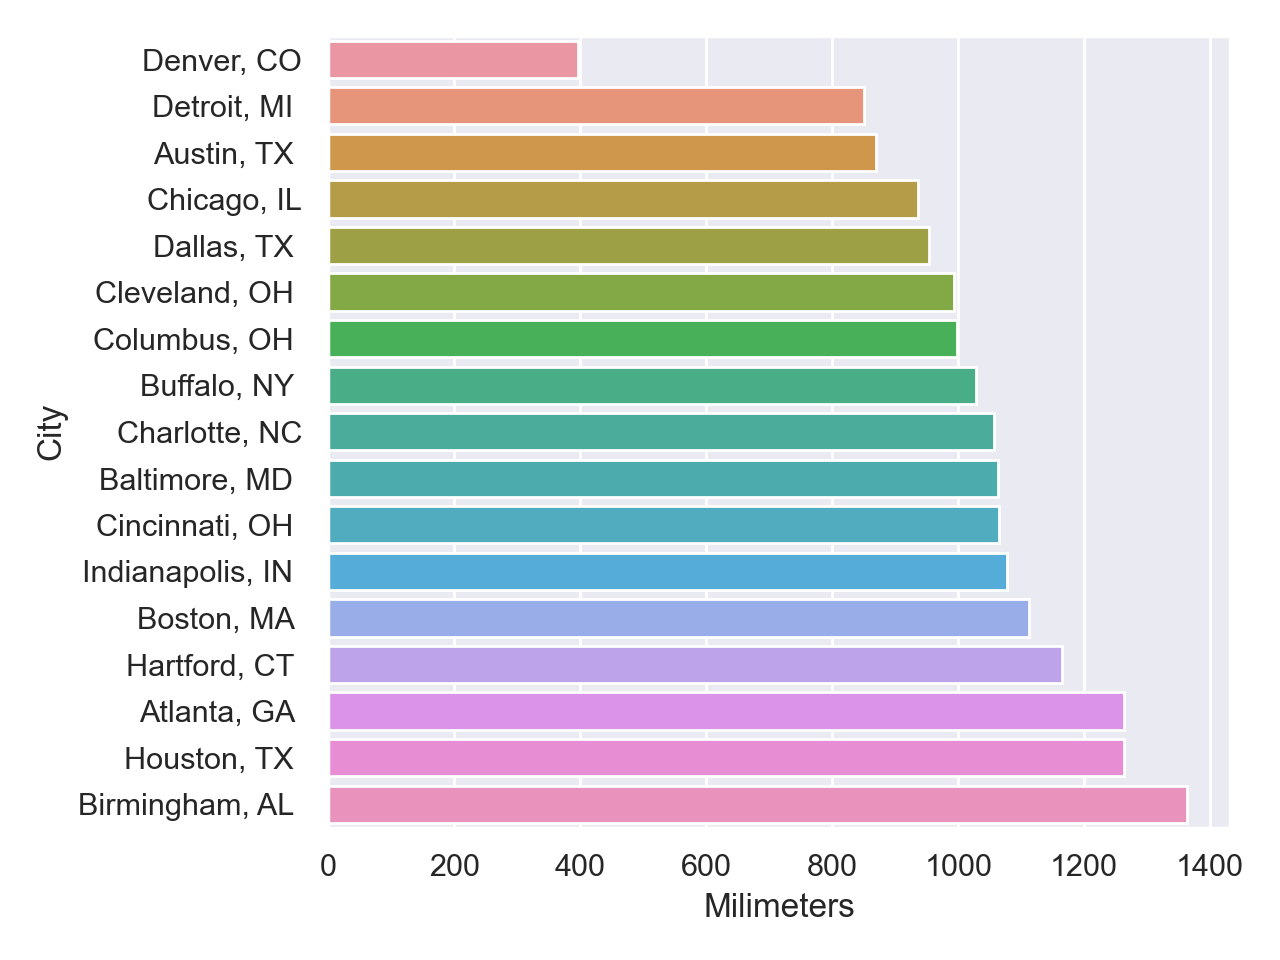

In [87]:
sns.set_style("darkgrid")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

Ok, set_style is not going to get me out of pastel rainbow decorative bar colors.

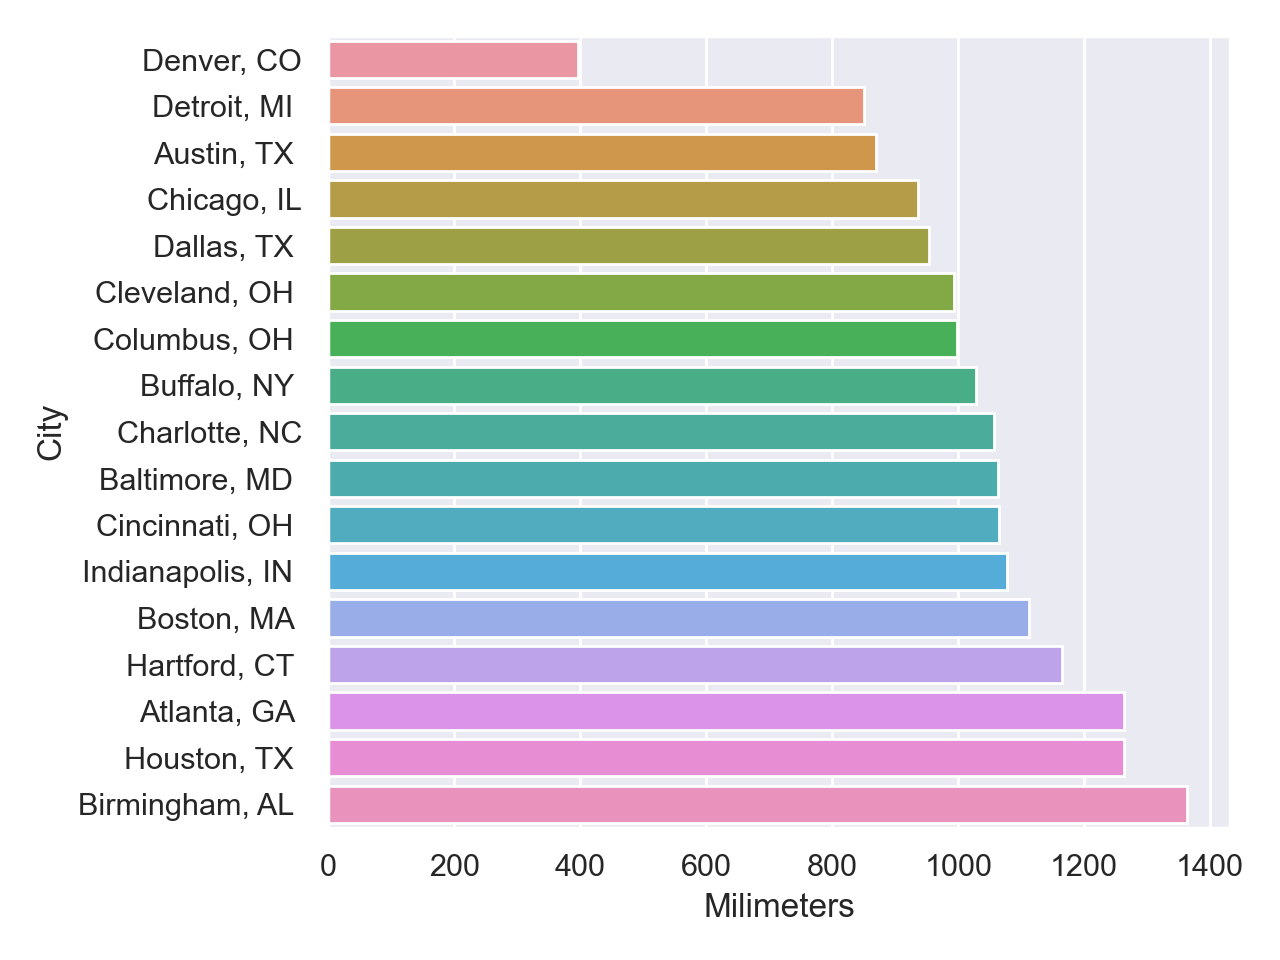

In [88]:
sns.color_palette("rocket")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

Text(0.5, 1.0, 'I see the drops of rain')

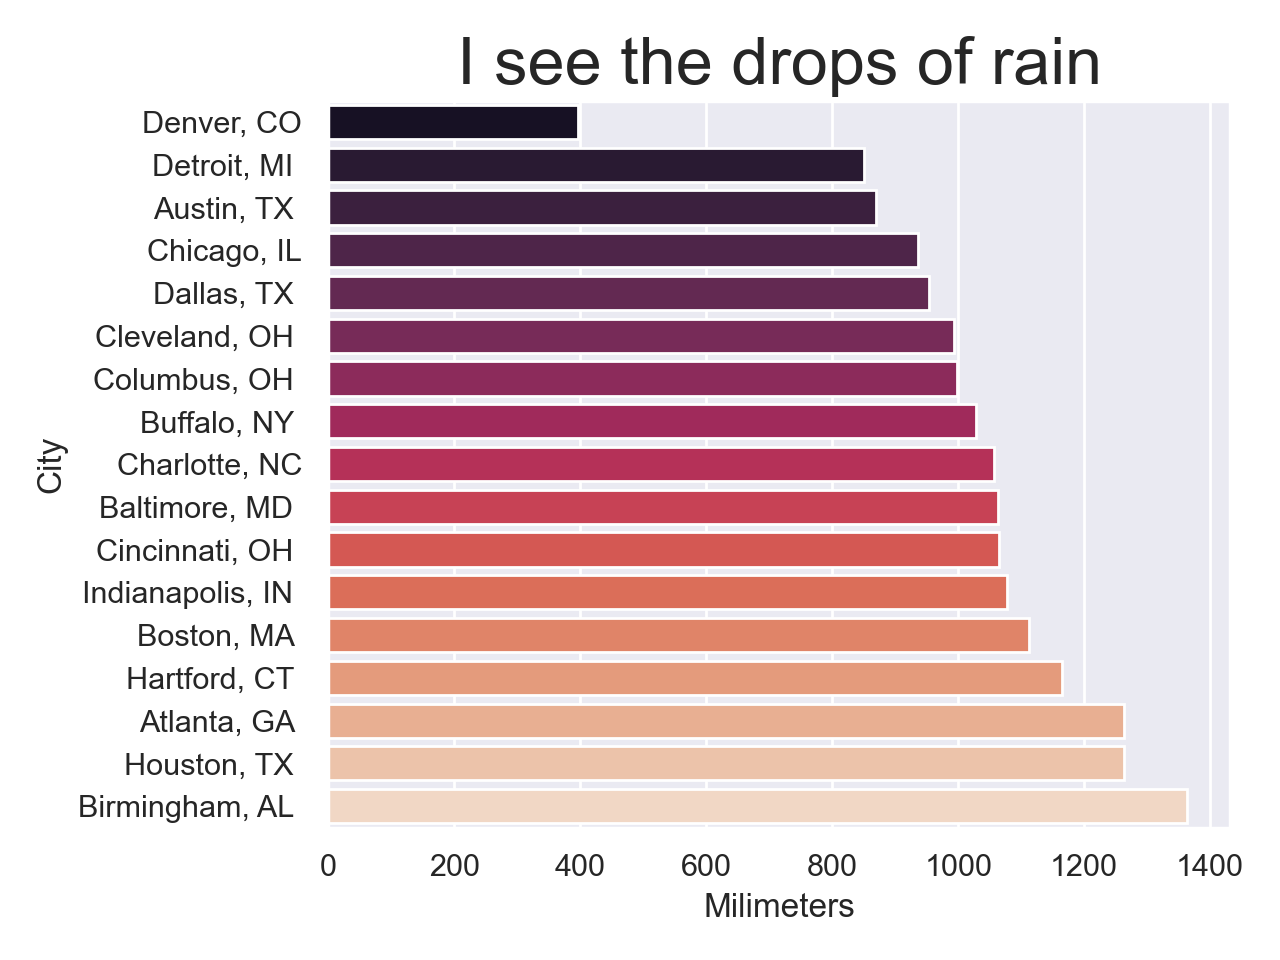

In [94]:
# That didn't do it either.
ax = sns.barplot(x="Milimeters", 
                 y="City", 
                 data=rainfallsorted, 
                 palette="rocket",
              )
plt.title("I hear the drizzle of the rain", fontsize=24)

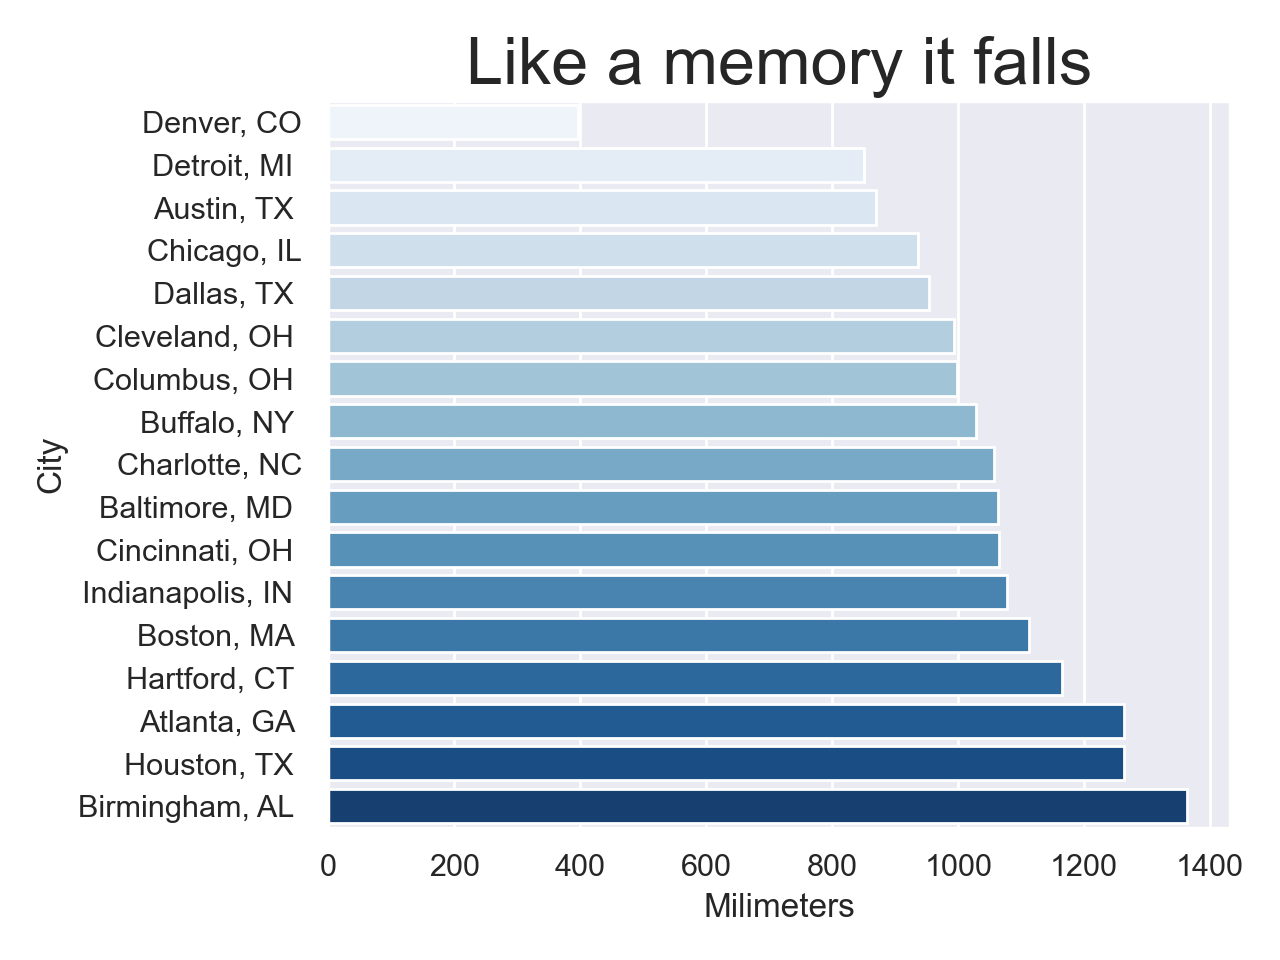

In [95]:
plt.title("Like a memory it falls", fontsize=24)
ax = sns.barplot(x="Milimeters", 
                 y="City", 
                 data=rainfallsorted, 
                 palette="Blues")


![City of Chicago](city-of-chicago.jpg "Chicago logo")

In [45]:
salary=pd.read_csv("~/Downloads/Current_Employee_Names__Salaries__and_Position_Titles.csv")

In [46]:
salary.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN


In [47]:
len(salary)

30382

In [48]:
salary.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary        float64
Hourly Rate          float64
dtype: object

In [49]:
salary["Salary or Hourly"]

0        Salary
1        Salary
2        Salary
3        Hourly
4        Salary
          ...  
30377    Salary
30378    Salary
30379    Salary
30380    Salary
30381    Salary
Name: Salary or Hourly, Length: 30382, dtype: object

In [50]:
salary["Salary or Hourly"].value_counts()

Salary    23881
Hourly     6501
Name: Salary or Hourly, dtype: int64

In [51]:
salary[salary["Salary or Hourly"] == "Salary"]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,118830.0,NaN
...,...,...,...,...,...,...,...,...
30377,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
30378,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
30379,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
30380,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN


In [52]:
salaried = salary[salary["Salary or Hourly"] == "Salary"]
hourly = salary[salary["Salary or Hourly"] == "Hourly"]

In [53]:
print(len(salaried))
print(len(hourly))

23881
6501


In [ ]:
len(salary)

<AxesSubplot:>

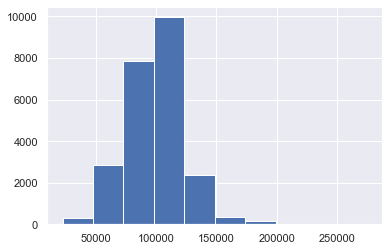

In [54]:
salary["Annual Salary"].hist()

(array([3.120e+02, 2.862e+03, 7.848e+03, 9.964e+03, 2.376e+03, 3.570e+02,
        1.380e+02, 2.100e+01, 1.000e+00, 2.000e+00]),
 array([ 22248. ,  47523.6,  72799.2,  98074.8, 123350.4, 148626. ,
        173901.6, 199177.2, 224452.8, 249728.4, 275004. ]),
 <BarContainer object of 10 artists>)

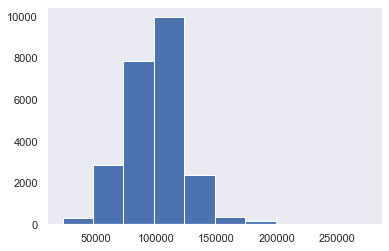

In [55]:
plt.hist(salaried["Annual Salary"])

In [56]:
salary["Annual Salary fix"] = pd.to_numeric(salary["Annual Salary"].str.replace(",", ""))

AttributeError: Can only use .str accessor with string values!

In [ ]:
pd.to_numeric(salary["Annual Salary"].str.replace(",", ""))

In [ ]:
salary["Annual Salary fix"].dtype

In [ ]:
plt.hist(salary["Annual Salary fix"])

In [ ]:
plt.hist(salary["Annual Salary fix"], bins=30)

Text(0.5, 0, 'Annual salary, $')

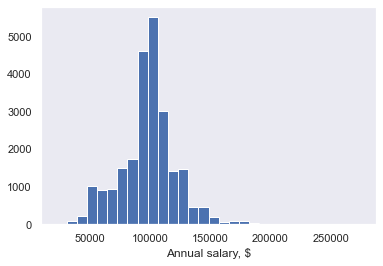

In [57]:
plt.hist(salary["Annual Salary"], bins=30)
plt.xlabel("Annual salary, $")

Text(0.5, 0, 'Annual salary, $')

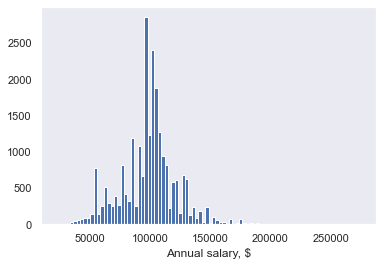

In [58]:
plt.hist(salary["Annual Salary"], bins=90)
plt.xlabel("Annual salary, $")

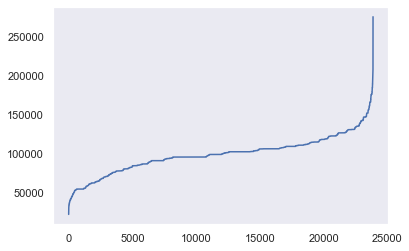

In [61]:
import numpy as np
plt.plot(np.arange(len(salary)), salary.sort_values("Annual Salary")["Annual Salary"]) 

In [67]:
a = pd.to_numeric(salary["Hourly Rate"].str.replace(",", ""))
a.head()

AttributeError: Can only use .str accessor with string values!

In [66]:
import altair as alt
alt.Chart(salary[0:5000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=True), y="count()")

alt.Chart(...)

In [ ]:
salary[0:1000]

In [ ]:
salaried = salary[salary["Salary or Hourly"] == "Salary"]
hourly = salary[salary["Salary or Hourly"] == "Hourly"]

In [ ]:
alt.Chart(salaried[0:10]).mark_bar().encode(alt.X("Annual Salary:Q", bin=True), alt.Y("count()"))

In [ ]:
# And if I want more resolution, I replace bin=True with  bin=alt.Bin(maxbins=N)

In [ ]:
salaried["Annual Salary fix"]

In [ ]:
salary["Department"].value_counts()

In [ ]:
import altair as alt
alt.Chart(salary[0:1000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=True), y="count()", color="Department")

In [ ]:
topdepts = salary["Department"].value_counts()[0:9]

In [ ]:
topdepts

In [63]:
alt.Chart(salary[0:1000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=alt.Bin(maxbins=30)), y="count()", color="Department")

alt.Chart(...)

In [64]:
topdepts = salary["Department"].value_counts()[0:9]

In [ ]:
topdepts


In [ ]:
topdepts.index

In [ ]:
deptwhitelist = set (topdepts.index)

In [ ]:
"PUBLIC LIBRARY" in deptwhitelist


In [ ]:
"HOGWARTS" in deptwhitelist

In [ ]:
"BOARD OF ETHICS" in deptwhitelist

In [ ]:
salary["Department_clean"] = salary["Department"]

In [65]:
for i in salary.index:
    if i < 10:
        print(salary.Department_clean[i])
    if salary.Department_clean[i] not in deptwhitelist:
        salary.Department_clean[i] = "OTHER"


AttributeError: 'DataFrame' object has no attribute 'Department_clean'

In [ ]:
salary.Department.value_counts()

In [ ]:
salary.Department_clean.value_counts()

In [62]:
alt.Chart(salary[0:5000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=alt.Bin(maxbins=30)), y="count()", color="Department_clean")

ValueError: Department_clean encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)